# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

From the data provided, supported with insights from outside research,
>i) Identify the factors influencing participation rates and scores in a state of interest,\
>ii) Make recommendations about how the College Board might work to increase the participation rate. 

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
# Imports:
import numpy as np   #import numpy with alias np
import pandas as pd  #import pandas with alias pd
from math import sqrt
from statistics import mean
import seaborn as sns           #import seaborn with alias sns
import matplotlib.pyplot as plt #import matplotlib.pyplot with alias plt
import matplotlib.colors as mcolors #import matplotlib.colors with alias mcolors

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# Read .csv files as pandas dataframes. 
sat2017_df = pd.read_csv('../data/sat_2017.csv')
act2017_df = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
# Display first 10 rows of sat2017_df.
print(sat2017_df.head(10))

                  State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  

In [4]:
# First 10 rows of act2017_df.
print(act2017_df.head(10))

                  State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2  


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [5]:
# Number of rows and columns in sat2017_df and act2017_df.
print(sat2017_df.shape)
print(act2017_df.shape)

(51, 5)
(52, 7)


**Answer:**
- sat2017 dataframe contains data on the participation and SAT scores (i.e. Evidence-Based Reading and Writing, Math and Total for the 51 states in U.S..
- act2017 dataframe contains data on the participation and ACT scores (i.e. English, Math, Reading, Science and Composite for the 51 states in U.S.
- There are inconsistent rows between sat2017(51rows) and act2017(52rows) dataframes. The additional row in act2017 dataframe is identified as one with 'National' entered for 'State' header. Also, the Composite score for Wyoming state in act2017_df is '20.2x'. This may cause issue with computational analysis later on. 

#### 4a. Does the data look complete? 

In [6]:
# Use .info() to review datatypes of the cell values of sat2017_df.
sat2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [7]:
# Use .info() to review datatypes of the cell values of act2017_df.
act2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


**Answer:** For both dataframes, the data looks complete; number of rows tallies with the respective RangeIndex. In addition, there are no null values.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [8]:
# Aggregate function to return min, max of the tests for sat2017.
sat2017_df[['Evidence-Based Reading and Writing', 'Math', 'Total']].agg(['min', 'max'])

,Evidence-Based Reading and Writing,Math,Total
min,482,52,950
max,644,651,1295


In [9]:
# Aggregate function to return min, max of the tests for act2017.
act2017_df[['English', 'Math', 'Reading', 'Science']].agg(['min', 'max'])

,English,Math,Reading,Science
min,16.3,18.0,18.1,2.3
max,25.5,25.3,26.0,24.9


**Answer:** From the min. and max. of the test scores, it appears the minimum for Math score in sat2017 dataframe is too low. The Science score in act2017 is too low.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [10]:
# Identify the problematic row in sat2017.
sat2017_df[sat2017_df['Math'] == sat2017_df['Math'].min()]  #we see the issue lies with row20, Maryland

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [11]:
# The correct Math score for Maryland is '524'.
# Update sat2017_df.
sat2017_df.iloc[20, 3] = 524

# Check that Math score for the dataframe is updated.
sat2017_df.loc[sat2017_df['State'] == 'Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [12]:
# # The correct Science score for Maryland is '23.2'.
# Update act2017_df.
act2017_df.iloc[21, 5] = 23.2

# Check that Science score for the dataframe is updated.
act2017_df.loc[act2017_df['State'] == 'Maryland']

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


#### 5. What are your data types? 
Display the data types of each feature. 

In [13]:
# Datatype information for sat2017_df.
sat2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [14]:
# Datatype information for act2017_df.
act2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Answer:** For both sat2017_df and act2017_df 'participation' values, these should be in numeric datatype (i.e. float or integer), not object for statistical computation. Similar observation applies for the 'Composite' values in act2017_df.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [15]:
# Function to convert datatype 'object' to 'float'.
"""Drop the last '%' in participation values, then convert to float."""
def drop_convert(object_):
    return object_.apply(lambda x: float(x[:-1]))

In [16]:
sat2017_df.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [17]:
# Apply the function to 'Participation' column from sat2017_df.
sat2017_df['Participation'] = drop_convert(sat2017_df['Participation'])
sat2017_df.head(2)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080


In [18]:
# Apply the function to 'Participation' column from sat2017_df.
act2017_df['Participation'] = drop_convert(act2017_df['Participation'])
act2017_df.head(2)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2


In [19]:
# Function to convert datatype 'object' to 'float'.
"""Convert the values to float on numeric columns (exclude 'State' column)."""
def convert_float(dataframe):
    cells = [col for col in dataframe.columns if col != 'State']
    dataframe[cells] = dataframe[cells].astype(float)
    return dataframe

In [20]:
# Convert sat2017_df cell value datatype to float (except 'State' column).
sat2017_df = convert_float(sat2017_df)

In [21]:
# Commented out as float conversion will throw an error.
#act2017_df = convert_float(act2017_df)

- Fix any individual values preventing other columns from being the appropriate type.

In [22]:
# Composite score for Wyoming State is '20.2x'.
"""Remove the 'x'."""
act2017_df.iloc[51, -1] = act2017_df.iloc[51, -1].strip('x')

In [23]:
# Display the problematic row.
act2017_df.tail(1)

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2


- Finish your data modifications by making sure the columns are now typed appropriately.

In [24]:
# Convert act2017_df cell value datatype to float (except 'State' column).
act2017_df = convert_float(act2017_df)

- Display the data types again to confirm they are correct.

In [25]:
# sat2017_df Datatypes.
sat2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     float64
 3   Math                                51 non-null     float64
 4   Total                               51 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [26]:
# act2017_df Datatypes.
act2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [27]:
# Rename sat2017_df headers.
sat2017_df.rename(columns={
    "State" : "state",
    "Participation" : "sat_participate_17",
    "Evidence-Based Reading and Writing" : "sat_evrw_17",
    "Math" : "sat_math_17",
    "Total" : "sat_total_17"
}, inplace=True)
sat2017_df.head(1) #Check updated headers.

,state,sat_participate_17,sat_evrw_17,sat_math_17,sat_total_17
0,Alabama,5.0,593.0,572.0,1165.0


In [28]:
# Rename act2017_df headers.
act2017_df.rename(columns={
    "State" : "state",
    "Participation" : "act_participate_17",
    "English" : "act_eng_17",
    "Math" : "act_math_17",
    "Reading" : "act_rding_17",
    "Science" : "act_science_17",
    "Composite" : "act_composite_17",
}, inplace=True)
act2017_df.head(1) #Check updated headers.

,state,act_participate_17,act_eng_17,act_math_17,act_rding_17,act_science_17,act_composite_17
0,National,60.0,20.3,20.7,21.4,21.0,21.0


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 



#### Data dictionary for SAT 2017 and ACT 2017 data frames

The dataframes for SAT and ACT scores have been cleaned and standardised iaw. data dictionary summarised below. 


|Feature|Type|Dataset|Description|
|----|----|----|----|
|**state**|*object*|ACT/SAT|Name of one of 51 states in the U.S.|
|**sat_participate_17**|*float*|SAT|Participation rate(%) for SAT 2017 (units percent to one decimal place, 1.0 means 1.0%)|
|**act_participate_17**|*float*|ACT|Participation rate(%) for ACT 2017 (units percent to one decimal place, 1.0 means 1.0%)|
||||For 'participate', the last 2 numbers denotes the year (e.g.17 means 2017 and so on)|
|**sat_evrw_17**|*float*|SAT|Evidence-Based Reading and Writing (EBRW) SAT 2017 score|
|**sat_math_17**|*float*|SAT|Math SAT 2017 score |
|**sat_total_17**|*float*|SAT|Sum of EVRW and Math scores for SAT 2017|
|**act_eng_17**|*float*|ACT|English ACT 2017 score|
|**act_math_17**|*float*|ACT|Math ACT 2017 score|
|**act_rding_17**|*float*|ACT|Reading ACT 2017 score|
|**act_science_17**|*float*|ACT|Science ACT 2017 score|
|**act_composite_17**|*float*|ACT|Average of English, Math, Reading and Science scores for ACT 2017|
||||For all scores, last 2 numbers denotes respective score for the year (e.g.17 means 2017 and so on)|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [29]:
# The extra row was earlier identified to be the row with 'state' being 'National'.
# Drop this row in the original dataframe.
act2017_df.drop([0],inplace=True)

In [30]:
# After dropping the row, reset the index to start from '0'.
act2017_df = act2017_df.reset_index(drop=True)
act2017_df.head(2) #Check correct row dropped and index.

,state,act_participate_17,act_eng_17,act_math_17,act_rding_17,act_science_17,act_composite_17
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [31]:
# Join act2017_df and sat2017_df on 'state' column as key.
# Assign merged dataframe to variable 'combined17_df'. 

combined17_df = sat2017_df.set_index(keys='state').join(act2017_df.set_index('state'))
combined17_df.head(2)

,sat_participate_17,sat_evrw_17,sat_math_17,sat_total_17,act_participate_17,act_eng_17,act_math_17,act_rding_17,act_science_17,act_composite_17
state,,,,,,,,,,
Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2
Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,19.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [32]:
# Export cleaned, merged dataframe to a csv file.
combined17_df.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [33]:
# Read .csv files as pandas dataframes. 
sat2018_df = pd.read_csv('../data/sat_2018.csv')
act2018_df = pd.read_csv('../data/act_2018_updated.csv')

In [34]:
# Display first 3 rows of sat2018_df.
print(sat2018_df.head(3))

     State Participation  Evidence-Based Reading and Writing  Math  Total
0  Alabama            6%                                 595   571   1166
1   Alaska           43%                                 562   544   1106
2  Arizona           29%                                 577   572   1149


In [35]:
# Display first 3 rows of act2018_df.
print(act2018_df.head(3))

     State  Percentage of Students Tested  Average Composite Score  \
0  Alabama                            100                     19.1   
1   Alaska                             33                     20.8   
2  Arizona                             66                     19.2   

   Average English Score  Average Math Score  Average Reading Score  \
0                   18.9                18.3                   19.6   
1                   19.8                20.6                   21.6   
2                   18.2                19.4                   19.5   

   Average Science Score  
0                   19.0  
1                   20.7  
2                   19.2  


In [36]:
# Number of rows and columns in sat2018_df and act2018_df.
print(sat2018_df.shape)
print(act2018_df.shape)

(51, 5)
(51, 7)


In [37]:
# Use .info() to review datatypes of the cell values of sat2018_df.
sat2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [38]:
# Use .info() to review datatypes of the cell values of act2017_df.
act2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [39]:
# Aggregate function to return min, max of the tests for sat2018.
sat2018_df[['Evidence-Based Reading and Writing', 'Math', 'Total']].agg(['min', 'max'])

,Evidence-Based Reading and Writing,Math,Total
min,480,480,977
max,643,655,1298


In [40]:
# Aggregate function to return min, max of the tests for act2018.
act2018_df[['Average English Score', 'Average Math Score', 'Average Reading Score',\
            'Average Science Score']].agg(['min', 'max'])

,Average English Score,Average Math Score,Average Reading Score,Average Science Score
min,16.6,17.8,18.0,17.9
max,26.0,25.2,26.1,24.9


**Answer:** 
The data for SAT 2018 and ACT 2018 is generally complete as there is no null values. The rows are also consistent.\
Comparing datatypes for 2018 dataset to 2017 dataset, the following steps is necessary if we are to merge them later on.\
i) Remove % sign from 'Participation' values for sat2018_df;\
ii) Convert all numeric values to float;\
iii) Header names of act2018 dataframe be updated.

In [41]:
# Remove the '%' from cells in 'Particiaption' column and\
# convert to float (except 'State' column) for sat2018_df.
sat2018_df['Participation'] = drop_convert(sat2018_df['Participation'])
sat2018_df.head(2)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106


In [42]:
# Convert sat2018_df cell value datatype to float (except 'State' column).
sat2018_df = convert_float(sat2018_df)
sat2018_df.head(2)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6.0,595.0,571.0,1166.0
1,Alaska,43.0,562.0,544.0,1106.0


In [43]:
# Convert act2018_df cell value datatype to float (except 'State' column).
act2018_df = convert_float(act2018_df)
act2018_df.head(2)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7


In [44]:
# Check correct datatypes implemented for both dataframes.
sat2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     float64
 3   Math                                51 non-null     float64
 4   Total                               51 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [45]:
act2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     float64
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [46]:
# Rename sat2018_df headers.
sat2018_df.rename(columns={
    "State" : "state",
    "Participation" : "sat_participate_18",
    "Evidence-Based Reading and Writing" : "sat_evrw_18",
    "Math" : "sat_math_18",
    "Total" : "sat_total_18"
}, inplace=True)
sat2018_df.head(1) #check updated headers

,state,sat_participate_18,sat_evrw_18,sat_math_18,sat_total_18
0,Alabama,6.0,595.0,571.0,1166.0


In [47]:
# Rename act2018_df headers.
act2018_df.rename(columns={
    "State" : "state",
    "Percentage of Students Tested" : "act_participate_18",
    "Average English Score" : "act_eng_18",
    "Average Math Score" : "act_math_18",
    "Average Reading Score" : "act_rding_18",
    "Average Science Score" : "act_science_18",
    "Average Composite Score" : "act_composite_18",
}, inplace=True)
act2018_df.head(1) #Check updated headers

,state,act_participate_18,act_composite_18,act_eng_18,act_math_18,act_rding_18,act_science_18
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0


In [48]:
# Merge sat2018_df and act2018_df on 'state' column as key.
# Assign merged dataframe to variable 'combined18_df'.
combined18_df = sat2018_df.set_index(keys='state').join(act2018_df.set_index('state'))
combined18_df.head(2)

,sat_participate_18,sat_evrw_18,sat_math_18,sat_total_18,act_participate_18,act_composite_18,act_eng_18,act_math_18,act_rding_18,act_science_18
state,,,,,,,,,,
Alabama,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,19.0
Alaska,43.0,562.0,544.0,1106.0,33.0,20.8,19.8,20.6,21.6,20.7


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [49]:
# Overview of combined17_df. Call up first 2 rows for brevity.
combined17_df.head(2)

,sat_participate_17,sat_evrw_17,sat_math_17,sat_total_17,act_participate_17,act_eng_17,act_math_17,act_rding_17,act_science_17,act_composite_17
state,,,,,,,,,,
Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2
Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,19.8


In [50]:
#Overview of combined18_df. Call up first 2 rows for brevity.
combined18_df.head(2)

,sat_participate_18,sat_evrw_18,sat_math_18,sat_total_18,act_participate_18,act_composite_18,act_eng_18,act_math_18,act_rding_18,act_science_18
state,,,,,,,,,,
Alabama,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,19.0
Alaska,43.0,562.0,544.0,1106.0,33.0,20.8,19.8,20.6,21.6,20.7


In [51]:
# Merge combined17_df and combined18_df on 'state' column.
# Assign merged dataframe to variable 'final_df'. 
final_df = combined17_df.join(combined18_df, on = 'state')

final_df.head(2)

,sat_participate_17,sat_evrw_17,sat_math_17,sat_total_17,act_participate_17,act_eng_17,act_math_17,act_rding_17,act_science_17,act_composite_17,sat_participate_18,sat_evrw_18,sat_math_18,sat_total_18,act_participate_18,act_composite_18,act_eng_18,act_math_18,act_rding_18,act_science_18
state,,,,,,,,,,,,,,,,,,,,
Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,19.0
Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,19.8,43.0,562.0,544.0,1106.0,33.0,20.8,19.8,20.6,21.6,20.7


In [52]:
# Save the contents of this merged dataframe as final.csv
final_df.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [53]:
# Import the combined dataframe.
final_df = pd.read_csv('../data/final.csv', index_col='state')

In [54]:
# Transpose the output of pandas describe method.
final_df.describe().transpose()
final_df.describe()

,sat_participate_17,sat_evrw_17,sat_math_17,sat_total_17,act_participate_17,act_eng_17,act_math_17,act_rding_17,act_science_17,act_composite_17,sat_participate_18,sat_evrw_18,sat_math_18,sat_total_18,act_participate_18,act_composite_18,act_eng_18,act_math_18,act_rding_18,act_science_18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,45.745098,563.686275,556.235294,1120.019608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,37.314256,47.502627,47.772623,94.155083,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [55]:
def stddev(lst):
    """returns the standard deviation of lst"""
    mn = mean(lst)
    variance = sum([(element-mn)**2 for element in lst]) / len(lst)
    return sqrt(variance)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [56]:
# Dictionary comprehension to apply standard deviation function to each numeric column in the dataframe.
"""Apply stddev function for each column in final_df dataframe,
    provided that the value in the column cell are of float64 datatype,
    then assign output to variable sd."""

sd = {col.name:stddev(col) for col in [final_df[i] for i in final_df.columns if (final_df[i].dtype=='float64')]}
# Call up the output for stddev function.
sd 

{'sat_participate_17': 34.92907076664508,
 'sat_evrw_17': 45.21697020437866,
 'sat_math_17': 46.65713364485503,
 'sat_total_17': 91.58351056778743,
 'act_participate_17': 31.824175751231806,
 'act_eng_17': 2.3304876369363363,
 'act_math_17': 1.9624620273436784,
 'act_rding_17': 2.0469029314842646,
 'act_science_17': 1.7222161451443676,
 'act_composite_17': 2.000786081581989,
 'sat_participate_18': 36.946619223539415,
 'sat_evrw_18': 47.03460978357609,
 'sat_math_18': 47.30194550378352,
 'sat_total_18': 93.22742384464433,
 'act_participate_18': 33.745194881997506,
 'act_composite_18': 2.0855261815801147,
 'act_eng_18': 2.4222536143202795,
 'act_math_18': 2.0157072555557174,
 'act_rding_18': 2.145891884510421,
 'act_science_18': 1.851688548483354}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [57]:
# Check the standard deviation using numpy's std, for sat_total_17.
np.std(final_df['sat_total_17'])

91.58351056778743

Answer: Manually calculated standard deviations matches with numpy's std method. They are close to pandas describe's output, but not exact.\
The reason is likely Pandas uses Bessel's correction by default; in the standard deviation formula denominator is N-1 instead of N.\
Setting the ddof=1 in Numpy's std should arrive at same result with Pandas standard deviation. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

#### Investigating which State(s) has highest and lowest participation rates for SAT and ACT.

In [58]:
# Overview of final_df; call up first 2 rows for brevity.
final_df.head(2)

,sat_participate_17,sat_evrw_17,sat_math_17,sat_total_17,act_participate_17,act_eng_17,act_math_17,act_rding_17,act_science_17,act_composite_17,sat_participate_18,sat_evrw_18,sat_math_18,sat_total_18,act_participate_18,act_composite_18,act_eng_18,act_math_18,act_rding_18,act_science_18
state,,,,,,,,,,,,,,,,,,,,
Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,19.0
Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,19.8,43.0,562.0,544.0,1106.0,33.0,20.8,19.8,20.6,21.6,20.7


In [59]:
# Aggregate the min, max of participation rates for sat2017,2018 and act2017,2018.
final_df[['sat_participate_17', 'sat_participate_18',\
          'act_participate_17', 'act_participate_18']].agg(['min', 'max'])

,sat_participate_17,sat_participate_18,act_participate_17,act_participate_18
min,2.0,2.0,8.0,7.0
max,100.0,100.0,100.0,100.0


In [60]:
# Create a sub dataframe for all participation rates.
psat_df = final_df[['sat_participate_17', 'sat_participate_18']]
pact_df = final_df[['act_participate_17', 'act_participate_18']]
psat_df.head(2) #Check the sub dataframe.

,sat_participate_17,sat_participate_18
state,,
Alabama,5.0,6.0
Alaska,38.0,43.0


In [61]:
# Lowest participation rate for sat 2017.
psat_df.sort_values('sat_participate_17').head()

,sat_participate_17,sat_participate_18
state,,
North Dakota,2.0,2.0
Mississippi,2.0,3.0
Iowa,2.0,3.0
Missouri,3.0,4.0
Utah,3.0,4.0


In [62]:
# Highest participation rate for sat 2017.
psat_df.sort_values('sat_participate_17', ascending = False).head()

,sat_participate_17,sat_participate_18
state,,
District of Columbia,100.0,92.0
Michigan,100.0,100.0
Connecticut,100.0,100.0
Delaware,100.0,100.0
New Hampshire,96.0,96.0


**Answer:** For SAT 2017 particiaption rates, North Dakota, Mississippi, Iowa, Missouri and Utah have lowest rates.\
District of Columbia, Michigan, Connecticut, Delaware, and New Hampshire have the highest rates.

In [63]:
# Lowest participation rate for sat 2018.
psat_df.sort_values('sat_participate_18').head()

,sat_participate_17,sat_participate_18
state,,
North Dakota,2.0,2.0
Wyoming,3.0,3.0
South Dakota,3.0,3.0
Nebraska,3.0,3.0
Wisconsin,3.0,3.0


In [64]:
# Highest participation rate for sat 2018.
psat_df.sort_values('sat_participate_18', ascending = False).head(10)

,sat_participate_17,sat_participate_18
state,,
Colorado,11.0,100.0
Connecticut,100.0,100.0
Delaware,100.0,100.0
Michigan,100.0,100.0
Idaho,93.0,100.0
Maine,95.0,99.0
Illinois,9.0,99.0
Rhode Island,71.0,97.0
New Hampshire,96.0,96.0


**Answer:** For SAT 2018 particiaption rates, North Dakota, Wyoming, South Dakota, Nebraska and Wincousin have lowest rates.\
Colorado, Connecticut, Delaware, Idaho and Michigan have the highest rates (100%).\
**Observe that Colorado, Illinois and Rhode Island have the largest increases in SAT participation rates between 2017 to 2018.**

In [65]:
# Lowest participation rate for act 2017.
pact_df.sort_values('act_participate_17').head()

,act_participate_17,act_participate_18
state,,
Maine,8.0,7.0
New Hampshire,18.0,16.0
Delaware,18.0,17.0
Rhode Island,21.0,15.0
Pennsylvania,23.0,20.0


In [66]:
# Highest participation rate for act 2017.
# From exploring the data earlier, observed more states participating in ACT.
pact_df.loc[(pact_df['act_participate_17'] == 100.0)]

,act_participate_17,act_participate_18
state,,
Alabama,100.0,100.0
Arkansas,100.0,100.0
Colorado,100.0,30.0
Kentucky,100.0,100.0
Louisiana,100.0,100.0
Minnesota,100.0,99.0
Mississippi,100.0,100.0
Missouri,100.0,100.0
Montana,100.0,100.0


**Answer:** For ACT 2017 particiaption rates, Maine, New Hampshire, Delaware, Rhode Island and Pennsylvania have lowest rate.\
17 States (Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississipi, Missouri, Montana\
Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wiscousin and Wyoming) have the highest\
rates.\
**ACT appears to be more popular than SAT, which higher participation rates for many States.**\
**Between ACT 2017 and 2018, among the states with high participation rates, Colorado has the largest drop of 70%. 

In [67]:
# Lowest participation rate for act 2018.
pact_df.sort_values('act_participate_18').head()

,act_participate_17,act_participate_18
state,,
Maine,8.0,7.0
Rhode Island,21.0,15.0
New Hampshire,18.0,16.0
Delaware,18.0,17.0
Pennsylvania,23.0,20.0


In [68]:
# Locate the rows, hence, State with highest participation rate for act 2018.
pact_df.sort_values('act_participate_18', ascending = False).head(10)

,act_participate_17,act_participate_18
state,,
Alabama,100.0,100.0
Kentucky,100.0,100.0
Wisconsin,100.0,100.0
Utah,100.0,100.0
Tennessee,100.0,100.0
South Carolina,100.0,100.0
Oklahoma,100.0,100.0
Ohio,75.0,100.0
North Carolina,100.0,100.0


**Answer:** For ACT 2018 particiaption rates, the same five states: Maine, New Hampshire, Delaware, Rhode Island and Pennsylvania have the lowest rates.\
Alabama, Kentucky, Wiscousin, Utah, Tennessee, South Carolina, Oklahoma, Ohio, North Carolina and Nevada, have the highest rates. **Among the states with low participation rates, Rhode Island has the largest relative drop.**


#### Investigating which State(s) has highest and lowest mean total/composite scores for SAT and ACT.

In [69]:
# Aggregate the min, max of sat total score and act composite score for sat2017,2018 and act2017,2018.
final_df[['sat_total_17', 'sat_total_18',\
          'act_composite_17', 'act_composite_18']].agg(['min', 'max'])

,sat_total_17,sat_total_18,act_composite_17,act_composite_18
min,950.0,977.0,17.8,17.7
max,1295.0,1298.0,25.5,25.6


In [70]:
# Create a sub dataframe for sat total.
sat_df = final_df[['sat_total_17', 'sat_total_18']]

In [71]:
# Create a sub dataframe for act total.
act_df = final_df[['act_composite_17', 'act_composite_18']]

In [72]:
# Lowest sat total score for sat 2017.
sat_df.sort_values('sat_total_17').head()

,sat_total_17,sat_total_18
state,,
District of Columbia,950.0,977.0
Delaware,996.0,998.0
Idaho,1005.0,1001.0
Michigan,1005.0,1011.0
Maine,1012.0,1013.0


In [73]:
# Highest sat total score for sat 2017.
sat_df.sort_values('sat_total_17',ascending=False).head()

,sat_total_17,sat_total_18
state,,
Minnesota,1295.0,1298.0
Wisconsin,1291.0,1294.0
Iowa,1275.0,1265.0
Missouri,1271.0,1262.0
Kansas,1260.0,1265.0


**Answer:** For SAT 2017 total scores, District of Columbia, Delaware, Idaho, Michigan and Maine have the lowest scores. 
Minnesota, Wincosin, Iowa, Missouri and Kansas have the highest scores.

In [74]:
# Lowest sat total score for sat 2018.
sat_df.sort_values('sat_total_18').head()

,sat_total_17,sat_total_18
state,,
District of Columbia,950.0,977.0
Delaware,996.0,998.0
West Virginia,1086.0,999.0
Idaho,1005.0,1001.0
Utah,1238.0,1010.0


In [75]:
# Highest sat total score for sat 2018.
sat_df.sort_values('sat_total_18',ascending=False).head()

,sat_total_17,sat_total_18
state,,
Minnesota,1295.0,1298.0
Wisconsin,1291.0,1294.0
North Dakota,1256.0,1283.0
Iowa,1275.0,1265.0
Kansas,1260.0,1265.0


**Answer:** For SAT 2018 total scores, District of Columbia, Delaware, and Idaho again have the lowest scores. 
Minnesota, Wincosin, Iowa and Kansas have again the highest scores. 

In [76]:
# Lowest act composite score for act 2017.
act_df.sort_values('act_composite_17').head()

,act_composite_17,act_composite_18
state,,
Nevada,17.8,17.7
Mississippi,18.6,18.6
South Carolina,18.7,18.3
Hawaii,19.0,18.9
North Carolina,19.1,19.1


In [77]:
# Highest act composite score for act 2017.
act_df.sort_values('act_composite_17',ascending=False).head()

,act_composite_17,act_composite_18
state,,
New Hampshire,25.5,25.1
Massachusetts,25.4,25.5
Connecticut,25.2,25.6
Maine,24.3,24.0
District of Columbia,24.2,23.6


**Answer:** For ACT 2017 composite scores, Nevada, Mississipi, South Carolina, Hawaii and North Carolina have lowest. Massachusetts, Connecticut, Maine and District of Columbia have the highest.

In [78]:
# Lowest act composite score for act 2018.
act_df.sort_values('act_composite_18').head()

,act_composite_17,act_composite_18
state,,
Nevada,17.8,17.7
South Carolina,18.7,18.3
Mississippi,18.6,18.6
Hawaii,19.0,18.9
Alabama,19.2,19.1


In [79]:
# Highest act composite score for act 2018.
act_df.sort_values('act_composite_18',ascending=False).head()

,act_composite_17,act_composite_18
state,,
Connecticut,25.2,25.6
Massachusetts,25.4,25.5
New Hampshire,25.5,25.1
New York,24.2,24.5
Michigan,24.1,24.4


**Answer:** For ACT 2018 composite scores, Nevada, Mississipi, South Carolina, Hawaii again have the lowest. Massachusetts, Connecticut, again have the highest.

#### Investigating which state(s) with 100% participation on a given test have a rate change year-to-year

In [80]:
# Identify which State(s) which 100% participation rate on sat has a rate change.
"""Assign the filtered dataframe with max. participation rates for sat 2017
to variable satmax_df."""
satmax_df = final_df[['sat_participate_17', 'sat_participate_18']]

"""Return the State(s) with rate change, if any"""
satmax_df.loc[(satmax_df['sat_participate_17'] == 100.0) & (satmax_df['sat_participate_18'] != 100.0)]


,sat_participate_17,sat_participate_18
state,,
District of Columbia,100.0,92.0


**Answer:** District of Columbia had 100% participation rate in SAT 2017. It dropped 8% to 92% in 2018.

In [81]:
# Identify which State(s) which 100% participation rate on act has a rate change.
"""Create a new dataframe with act participations. Assign to variable d"""
d = final_df[['act_participate_17','act_participate_18']]

"""Return the State(s) with rate change, if any"""
d.loc[(d['act_participate_17'] == 100.0) & (d['act_participate_18'] != 100.0)]

,act_participate_17,act_participate_18
state,,
Colorado,100.0,30.0
Minnesota,100.0,99.0


**Answer:** Colorado and Minnesota both had 100% participation in ACT 2017. **Colorado dropped 70%** while Minnesota dropped 1% in ACT 2018.


#### Investigating any states have >50% participation on both tests either year

In [82]:
"""Create a new dataframe with the participation rates,
    assign it to variable 'p_df' (e.g. participation)."""
p = final_df[['sat_participate_17','sat_participate_18','act_participate_17','act_participate_18']]
p.head(2)

,sat_participate_17,sat_participate_18,act_participate_17,act_participate_18
state,,,,
Alabama,5.0,6.0,100.0,100.0
Alaska,38.0,43.0,65.0,33.0


In [83]:
# Filter and return States with >50% participation rates on both tests, either year.
"""Select only States with >50% participation on both tests for 2017, 
and combine this with the results for States with >50% participation on both tests for 2018."""
p.loc[(p['sat_participate_17'] > 50.0) & (p['act_participate_17'] > 50.0)|\
      (p['sat_participate_18'] > 50.0) & (p['act_participate_18'] > 50.0)]

,sat_participate_17,sat_participate_18,act_participate_17,act_participate_18
state,,,,
Florida,83.0,56.0,73.0,66.0
Georgia,61.0,70.0,55.0,53.0
Hawaii,55.0,56.0,90.0,89.0
North Carolina,49.0,52.0,100.0,100.0
South Carolina,50.0,55.0,100.0,100.0


**Answer:** Florida, Georgia, Hawaii, North Carolina and South Carolina have more than 50% participation on both tests either year.

**Which state is of particular interest?**

**Answer:**
From literature research, both ACT and SAT are both universally accepted University entrance tests. Both tests are offered by __[nonprofit organisations](https://www.usnews.com/education/best-colleges/articles/act-vs-sat-how-to-decide-which-test-to-take)__. The **College Board offers the SAT**, while the ACT organization offers the ACT tests.

From the exploratory data analysis so far, Colorado seem interesting:
- Between ACT 2017 and 2018, among the states with high participation rates, Colorado has the largest drop of 70%. We could delve deeper into this observation.

In [84]:
final_df.loc[['Colorado'],['sat_participate_17', 'sat_total_17', 'sat_participate_18', 'sat_total_18']]

,sat_participate_17,sat_total_17,sat_participate_18,sat_total_18
state,,,,
Colorado,11.0,1201.0,100.0,1025.0


In [85]:
# Aggregate the min, max of participation rates for sat2017,2018 and act2017,2018.
final_df[['sat_participate_17', 'sat_total_17',\
          'sat_participate_18', 'sat_total_18']].agg(['min', 'max'])

,sat_participate_17,sat_total_17,sat_participate_18,sat_total_18
min,2.0,950.0,2.0,977.0
max,100.0,1295.0,100.0,1298.0


**Answer:** While Colorado's SAT participation increased significantly in 2018, its total score decreased.

In [86]:
final_df.loc[['Colorado'],['act_participate_17', 'act_composite_17', 'act_participate_18', 'act_composite_18']]

,act_participate_17,act_composite_17,act_participate_18,act_composite_18
state,,,,
Colorado,100.0,20.8,30.0,23.9


In [87]:
# Aggregate the min, max of sat total score and act composite score for sat2017,2018 and act2017,2018.
final_df[['act_participate_17', 'act_composite_17',\
          'act_participate_18', 'act_composite_18']].agg(['min', 'max'])

,act_participate_17,act_composite_17,act_participate_18,act_composite_18
min,8.0,17.8,7.0,17.7
max,100.0,25.5,100.0,25.6


**Answer:** Here we see a reverse trend. Colorado's ACT participation decreased significantly in 2018, and its composite score increased. The increase in ACT score could be due to a sizeable cohort of lower performing students shifting to the SAT tests.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

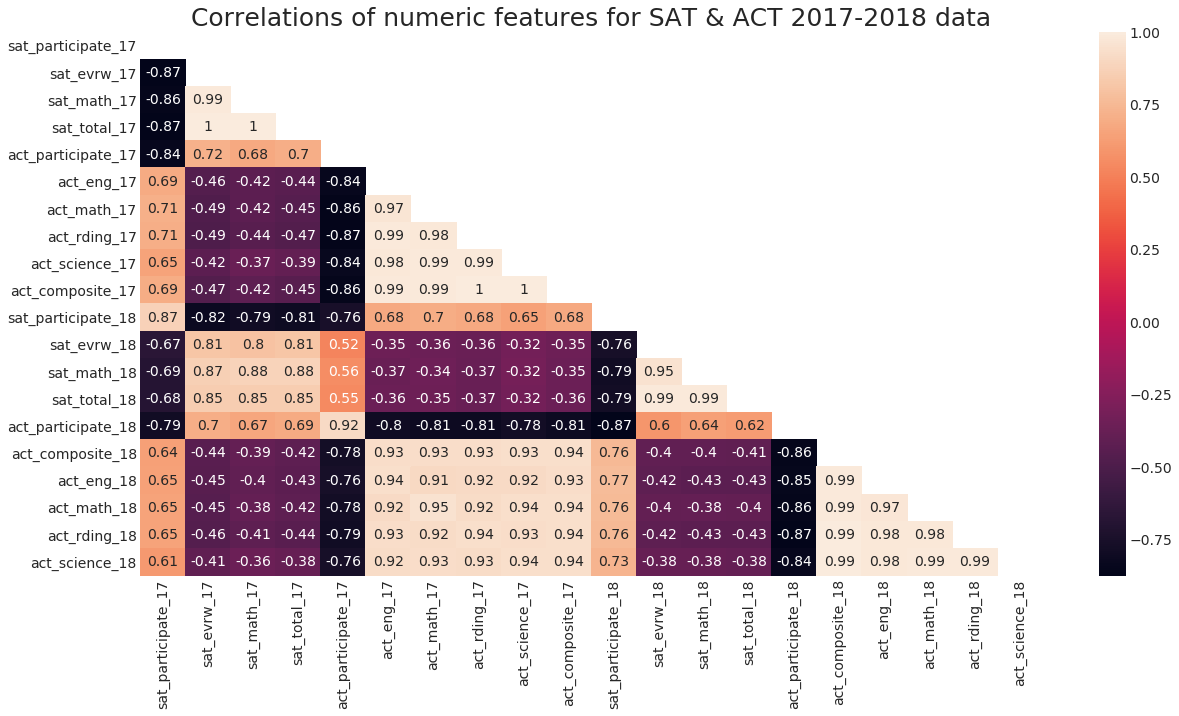

In [88]:
# Apply pandas.corr() on final_df dataframe, assign to variable 'satact_correlations'.
satact_correlations = final_df.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(satact_correlations)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap.
"""Maskstyle of upper triangle to be white."""
with sns.axes_style("white"):
    """Establish figsize"""
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(satact_correlations, mask=mask, annot=True)
    
# Set title. 
# Heatmap is an axes-level function, so either plt.title or ax.set_title can be used.
plt.title("Correlations of numeric features for SAT & ACT 2017-2018 data", fontsize =25);

**Answer:** 
- There is a positive correlation among the SAT consistuent subjects and total scores. This is similar for the ACT scores. This is to be expected as the total scores is aggregated from the consistuent subject scores.
- Between ACT and SAT scores, we observe that the correlation is weakly negative. This would infer that one doing well in act test would not necessary do well in the other.
- Betwen ACT and SAT participation rates, we observe a strong negative correlation. This infers the students taking ACT may not been inclined to take SAT tests, and vice versa.
- For participation rates and scores, they are negatively correlated. Low particiation rates means the students participating in the tests tend to be better performing ones.
- For SAT, there is a decrease in the negative correlation between participation rates and scores, from 2017 to 2018.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [89]:
"""def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(18, 10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot"""

"def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):\n    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows\n    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(18, 10)) # You'll want to specify your figsize\n    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate\n    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists\n        ax[i].hist(dataframe[column]) # feel free to add more settings\n        # Set titles, labels, etc here for each subplot"

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [90]:
#Define function for histogram subplots
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 13)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],color='midnightblue', bins = 10, alpha=0.7) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        #for i, title in enumerate(list_of_titles):
        ax[i].set_title(list_of_titles[i], fontsize=16)
            #for i, label in enumerate(list_of_xlabels):
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=12)

#### Histogram set 1: Participation rates for SAT & ACT

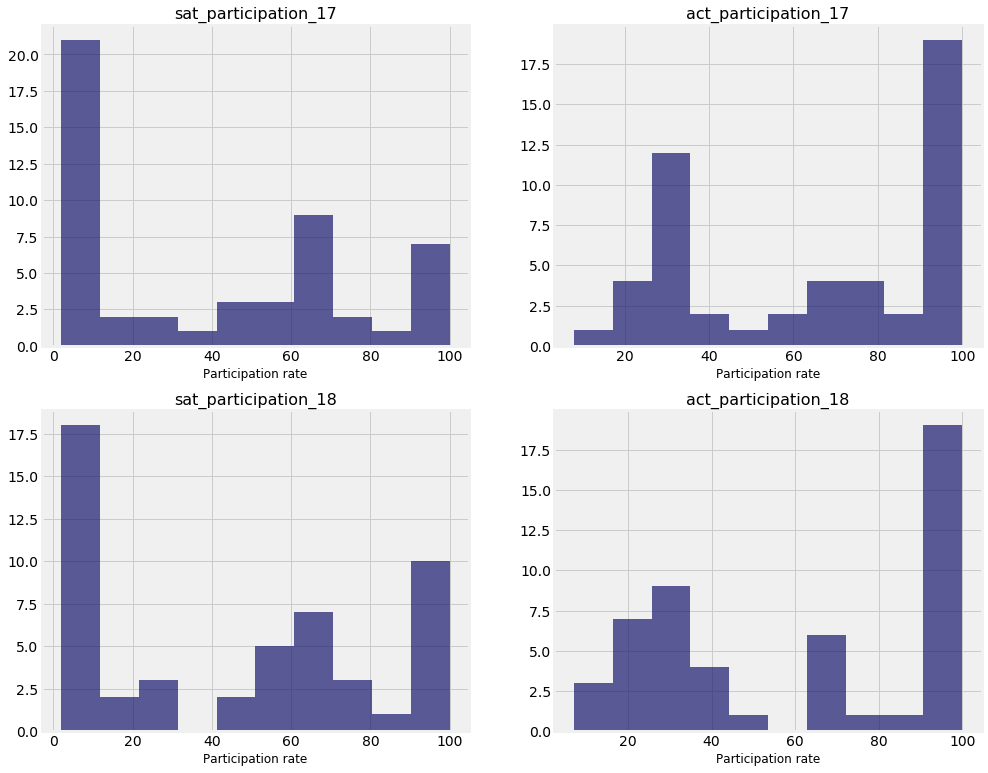

In [91]:
# Define the variables relevant to SAT & ACT Participation rates.
list_of_columns1 = ['sat_participate_17', 'act_participate_17','sat_participate_18', 'act_participate_18']
list_of_titles1 = ['sat_participation_17', 'act_participation_17', 'sat_participation_18', 'act_participation_18']
list_of_xlabels1 = ['Participation rate', 'Participation rate', 'Participation rate', 'Participation rate']
# Plot the Histograms.
subplot_histograms(final_df,list_of_columns1, list_of_titles1, list_of_xlabels1)

**Answer:** Histograms shows frequency distribution of observations across the observation classes.
- The number of states and participation rates are represented on the y-axis and x-axis respectively.
- The SAT participation is generally right skewed and appears bi-modal. 
- The ACT participation is generally left skewed.
- SAT has a higher number of states around the 10% participation rate. This is not the case for ACT.

#### Histogram set 2: Math scores for SAT & ACT

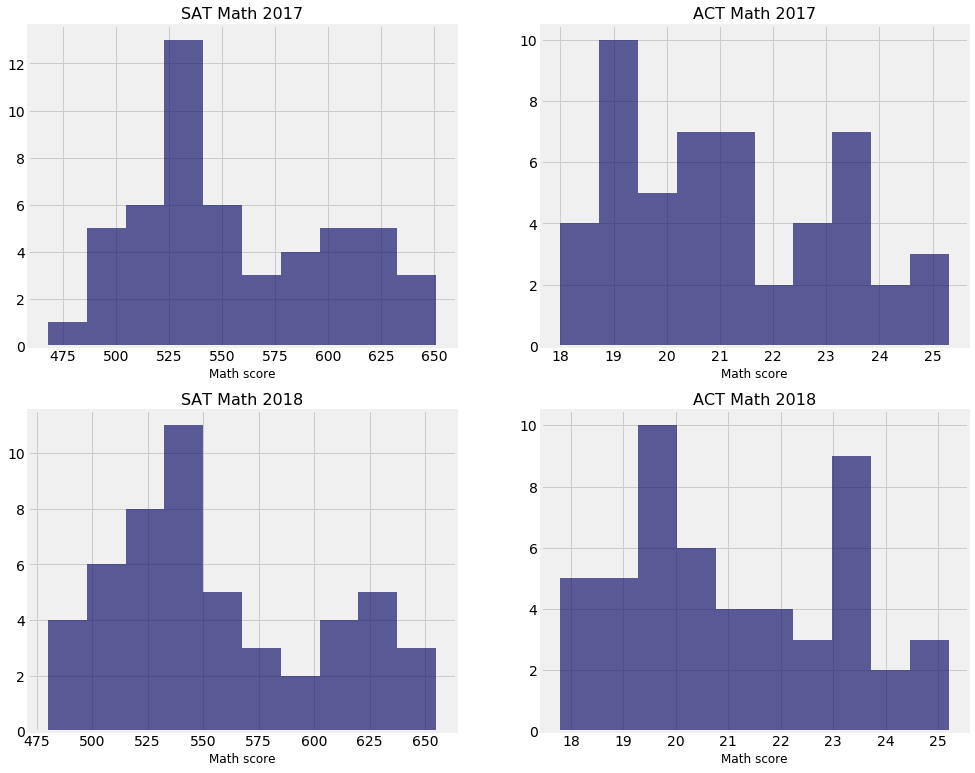

In [92]:
# Define the variables relevant to SAT & ACT Math scores.
list_of_columns1 = ['sat_math_17', 'act_math_17', 'sat_math_18', 'act_math_18']
list_of_titles1 = ['SAT Math 2017', 'ACT Math 2017', 'SAT Math 2018', 'ACT Math 2018']
list_of_xlabels1 = ['Math score', 'Math score', 'Math score', 'Math score']
# Plot the Histograms.
subplot_histograms(final_df,list_of_columns1, list_of_titles1, list_of_xlabels1)

**Answer:** The number of states and math scores are represented on the y-axis and x-axis respectively.
- The SAT math score plots are generally bi-modal with valley in between. They are slightly right-skewed. 
- The ACT math score plots are bi-modal as well with valley in between.
- The second mode across the four histograms infer that a cluster of states have higher math scores. In the case of SAT math score, the mode is lower, which infers that the better performing states have lower participate rates.

#### Histogram set 3: Reading/verbal scores for SAT & ACT

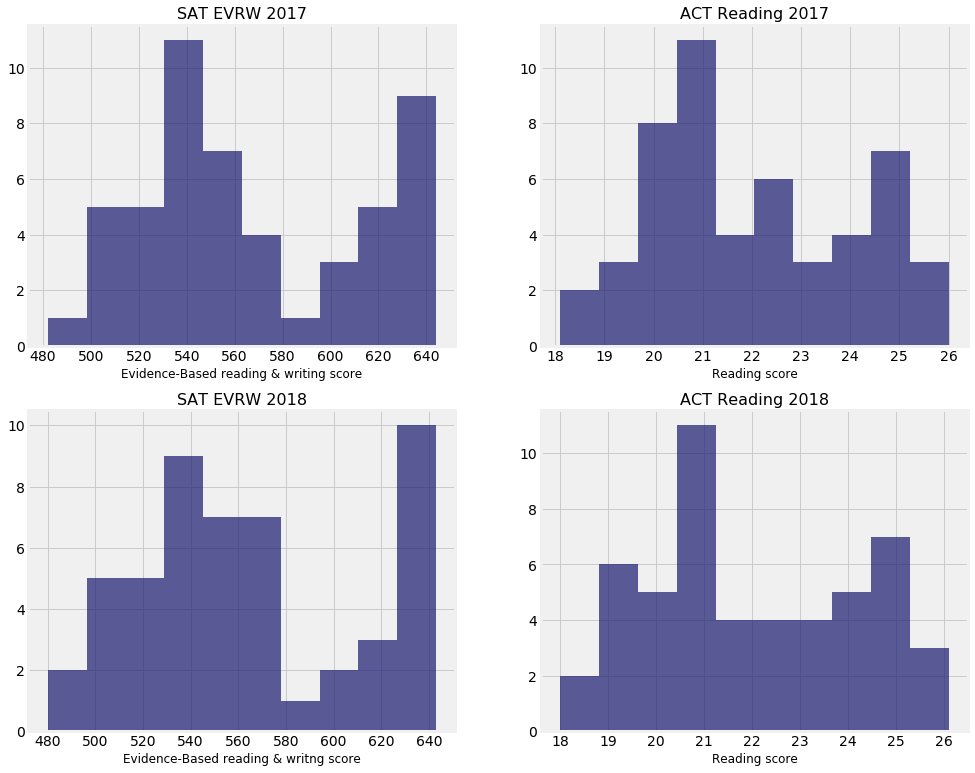

In [93]:
# Define the variables relevant to SAT & ACT reading and verbal scores.
list_of_columns1 = ['sat_evrw_17', 'act_rding_17','sat_evrw_18', 'act_rding_18']
list_of_titles1 = ['SAT EVRW 2017', 'ACT Reading 2017', 'SAT EVRW 2018', 'ACT Reading 2018']
list_of_xlabels1 = ['Evidence-Based reading & writing score', 'Reading score',\
                    'Evidence-Based reading & writng score', 'Reading score']
# Plot the Histograms.
subplot_histograms(final_df,list_of_columns1, list_of_titles1, list_of_xlabels1)

**Answer:** The number of states and reading/verbal scores are represented on the y-axis and x-axis respectively.
- The SAT scores plots are generally bi-modal, with valley in between.
- Similar distribution is observed for ACT reading scores. 
- Quite similar to SAT math scores, the SAT reading the second mode is lower, which infers that the better performing states have lower participate rates.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


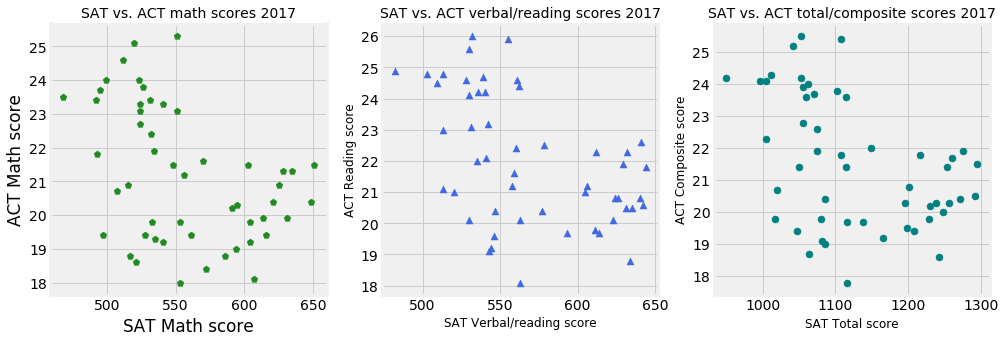

In [94]:
fig, ax = plt.subplots(1,3,figsize=(15, 5))
ax = ax.ravel()
"""Left plot - SAT math vs. ACT math (2017)."""
ax[0].scatter(final_df['sat_math_17'], final_df['act_math_17'], marker = 'p', s=7**2,c='forestgreen')
ax[0].set_title('SAT vs. ACT math scores 2017', fontsize=14)
ax[0].set_xlabel('SAT Math score')
ax[0].set_ylabel('ACT Math score')

"""Middle plot - SAT vs. ACT verbal/reading scores for 2017."""
ax[1].scatter(final_df['sat_evrw_17'], final_df['act_rding_17'], marker = '^', s=7**2,c='royalblue')
ax[1].set_title('SAT vs. ACT verbal/reading scores 2017', fontsize=14)
ax[1].set_xlabel('SAT Verbal/reading score', fontsize=12)
ax[1].set_ylabel('ACT Reading score',fontsize=12)

"""Right plot - SAT vs. ACT total/composite scores for 2017."""
ax[2].scatter(final_df['sat_total_17'], final_df['act_composite_17'], marker = 'o', s=7**2,c='teal')
ax[2].set_title('SAT vs. ACT total/composite scores 2017', fontsize=14)
ax[2].set_xlabel('SAT Total score',fontsize=12)
ax[2].set_ylabel('ACT Composite score',fontsize=12);

**Answer:** The general observation is that there is a weak negative correlation between the ACT scores and SAT scores for each above three scatterplots. Doing well in ACT test does not guarantee good performance in SAT test. This could be one reason there is negative correlation between SAT and ACT participations (i.e. students are not inclined to take ACT if taken SAT and vice versa).

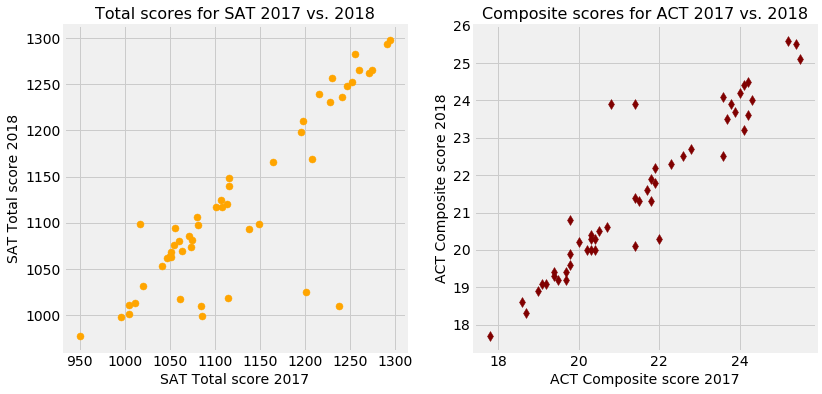

In [95]:
fig, ax = plt.subplots(1,2,figsize=(12, 6))
ax = ax.ravel()
"""Left plot - Total scores for SAT 2017 vs. 2018."""
ax[0].scatter(final_df['sat_total_17'], final_df['sat_total_18'], marker = 'o', s=7**2,c='orange')
ax[0].set_title('Total scores for SAT 2017 vs. 2018', fontsize=16)
ax[0].set_xlabel('SAT Total score 2017', fontsize=14)
ax[0].set_ylabel('SAT Total score 2018', fontsize=14)

"""Right right plot - Composite scores for ACT 2017 vs. 2018."""
ax[1].scatter(final_df['act_composite_17'], final_df['act_composite_18'], marker = 'd', s=7**2,c='maroon')
ax[1].set_title('Composite scores for ACT 2017 vs. 2018', fontsize=16)
ax[1].set_xlabel('ACT Composite score 2017', fontsize=14)
ax[1].set_ylabel('ACT Composite score 2018', fontsize=14);

**Answer:** There is a strong positive correlations between SAT total scores 2017 and 2018, though there are a few outliers observed. Similar phenomena is observed between ACT composite scores 2017 and 2018.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

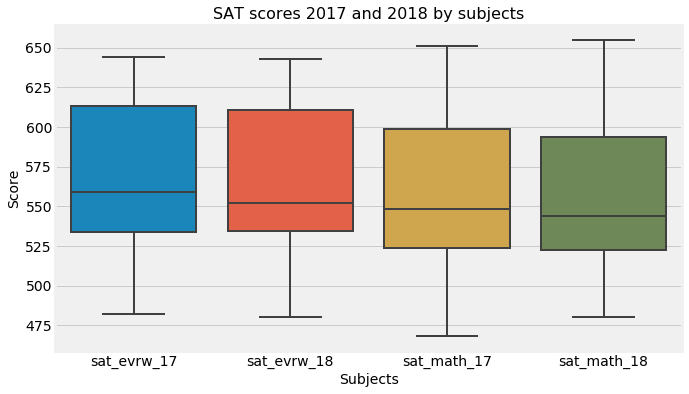

In [96]:
#SAT scores 2017 and 2018
plt.figure(figsize = (10, 6))
plt.title("SAT scores 2017 and 2018 by subjects", size = 16)
sns.boxplot(data = final_df[["sat_evrw_17", "sat_evrw_18", "sat_math_17", "sat_math_18"]], linewidth=2, fliersize=4)
plt.ylabel("Score", size = 14)
plt.xlabel("Subjects", size = 14)
plt.xticks(size = 14)
plt.yticks(size = 14);

**Answer:** The median and range for SAT i) Evidence-based reading and writing and ii) Math across 2017 and 2018 are generally consistent. There are no outliers observed.

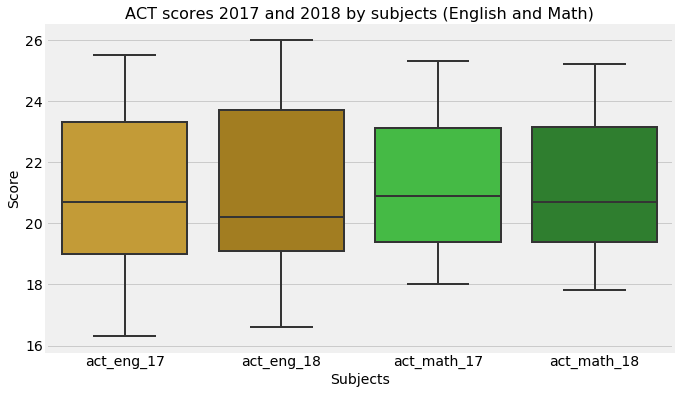

In [97]:
#ACT scores 2017 and 2018 (English and Math)
plt.figure(figsize = (10, 6))
plt.title("ACT scores 2017 and 2018 by subjects (English and Math)", size = 16)
"""Define color palette for box plots"""
my_palette = {"act_eng_17" : "goldenrod", "act_eng_18" : "darkgoldenrod",
              "act_math_17" : "limegreen", "act_math_18" : "forestgreen"}

sns.boxplot(data = final_df[["act_eng_17", "act_eng_18", "act_math_17", "act_math_18"]],\
            linewidth=2, fliersize=4, palette=my_palette)
plt.ylabel("Score", size = 14)
plt.xlabel("Subjects", size = 14)
plt.xticks(size = 14)
plt.yticks(size = 14);

**Answer:** The median and range for ACT i) Evidence-based reading and writing and ii) Math across 2017 and 2018 are generally consistent. There are no outliers observed.

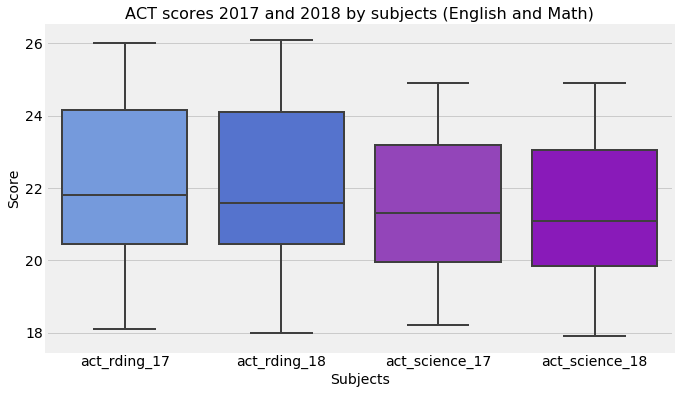

In [98]:
#ACT scores 2017 and 2018 (Reading and Science)
plt.figure(figsize = (10, 6))
plt.title("ACT scores 2017 and 2018 by subjects (English and Math)", size = 16)
"""Define color palette for box plots"""
my_palette = {"act_rding_17" : "cornflowerblue", "act_rding_18" : "royalblue",
              "act_science_17" : "darkorchid", "act_science_18" : "darkviolet"}

sns.boxplot(data = final_df[["act_rding_17", "act_rding_18", "act_science_17", "act_science_18"]],\
            linewidth=2, fliersize=4, palette=my_palette)
plt.ylabel("Score", size = 14)
plt.xlabel("Subjects", size = 14)
plt.xticks(size = 14)
plt.yticks(size = 14);

**Answer:** The median and range for ACT i) Evidence-based reading and writing and ii) Math across 2017 and 2018 are generally consistent. 

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

**Answer:** 
From the EDA thus far, there are several areas for further exploration:
- Between ACT 2017 and 2018, Colorado has the largest drop of 70% in participation rates. What is the effect on ACT composite test scores? 
- What about its SAT participation rates and scores?

In [99]:
# Summary of Colorado's participation rates 2017-2018.
final_df.loc[['Colorado'],['sat_participate_17','sat_participate_18','act_participate_17', 'act_participate_18']]

,sat_participate_17,sat_participate_18,act_participate_17,act_participate_18
state,,,,
Colorado,11.0,100.0,100.0,30.0


In [100]:
# Summary of Colorado's total scores 2017-2018.
final_df.loc[['Colorado'],['sat_total_17','sat_total_18','act_composite_17', 'act_composite_18']]

,sat_total_17,sat_total_18,act_composite_17,act_composite_18
state,,,,
Colorado,1201.0,1025.0,20.8,23.9


**Answer:** Participation rates for SAT surged to 100%, while ACT participation dropped to 30%  in 2018. Correspondingly, there is a decrease in SAT total score, and increase in ACT composite score. The magnitude in change should be attributed to a reason localised to Colorado.  

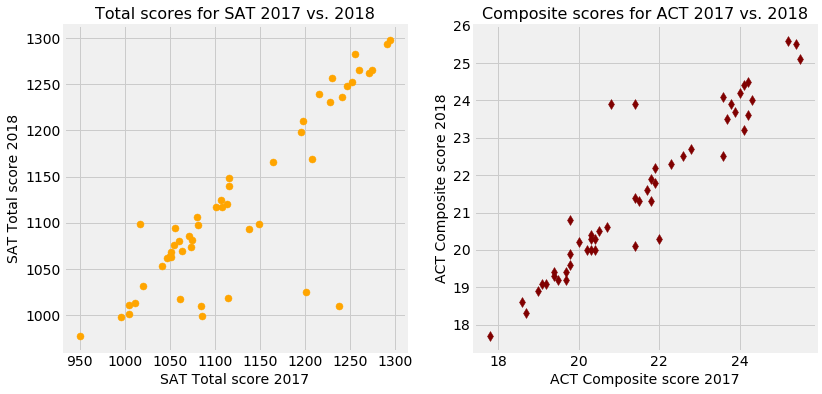

In [101]:
# Plot distribution of total scores by State, across 2017 and 2018.
fig, ax = plt.subplots(1,2,figsize=(12, 6))
ax = ax.ravel()
"""Left plot - Total scores for SAT 2017 vs. 2018."""
ax[0].scatter(final_df['sat_total_17'], final_df['sat_total_18'], marker = 'o', s=7**2,c='orange')
ax[0].set_title('Total scores for SAT 2017 vs. 2018', fontsize=16)
ax[0].set_xlabel('SAT Total score 2017', fontsize=14)
ax[0].set_ylabel('SAT Total score 2018', fontsize=14)

"""Right right plot - Composite scores for ACT 2017 vs. 2018."""
ax[1].scatter(final_df['act_composite_17'], final_df['act_composite_18'], marker = 'd', s=7**2,c='maroon')
ax[1].set_title('Composite scores for ACT 2017 vs. 2018', fontsize=16)
ax[1].set_xlabel('ACT Composite score 2017', fontsize=14)
ax[1].set_ylabel('ACT Composite score 2018', fontsize=14);

**Answer:** SAT total scores by states is postively correlated across 2017 and 2018. There are two outliers observed, of which one of them is Colorado. (The other is likely Illinois with 90% increase in participation rates for SAT from 2017 and 2018.) With the increase in SAT participation, ACT participation decreased. This led to the drop in SAT score and increase in ACT score across years 2017-2018.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [102]:
final_df.describe()

,sat_participate_17,sat_evrw_17,sat_math_17,sat_total_17,act_participate_17,act_eng_17,act_math_17,act_rding_17,act_science_17,act_composite_17,sat_participate_18,sat_evrw_18,sat_math_18,sat_total_18,act_participate_18,act_composite_18,act_eng_18,act_math_18,act_rding_18,act_science_18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,45.745098,563.686275,556.235294,1120.019608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,37.314256,47.502627,47.772623,94.155083,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


##### **Answers:**
SAT
- sat_participate_17 and 18 have similar ranges (2% to 100%). sat_participate_17 mean(39.8)is lower than median(38.0) ; right skewed distribution. sat_participate_18 mean(45.7) is lower than median(52); left-skewed distribution. Respective histograms confirms this. 
- sat_math_17 mean(556.9) is lower than median(548.0); right-skewed. Similar observation for sat_math_18 with mean(556.2) and median(552). The quantiles, min and max are represented in respective box plots. No outliers in boxplots.
- The mean is higher than the median for both sat_evrw_17 and 18, infers a right-skewed distribution. Histogram plots showed both sat_evrw_17 and sat_evrw_18 have a bi-modal distribution. The quantiles, min and max are represented in respective box plots. No outliers in boxplots.

ACT
- act_participate_17 and act_participate_18 have similar ranges (7 to 100%). act_participate_17 mean(65.3) is lower than median(69.0); left-skewed. act_participate_18 mean(61.6) is lower than median(66); left-skewed. Respective histograms confirms this. 
- act_eng_17 appears to be symmetrically distributed from the summmary statistics figures and box plots (no outliers). act_eng_18 has a median closer to the 25th percentile from the box plot. No outliers observed.
- The mean is higher than median for both act_math_17 and 18, inferring right-skewed distributions. Further information from histogram shows act_math_17 is uni-modal (one mode at 19), and act_math_18 is bi-modal (two modes at 19.5 and 23.5). No outliers in boxplots.  
- act_rding_17 and act_rding_18 have right-skewed distributions. The modes from the histogram (both at 21.0) are lower than the mean and median. 
- The min(2.3) for act_science_17 infers there is potential outlier(s), and this is confirmed via the boxplot. act_science_18 appears to be symmetrically distributed. There are no outliers from the boxplot.


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assume that data we sample from a population will be normally distributed. Do we observe this trend?***

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

**Answer:** In CLT, we take a number of random samples of the same size from the population repeatedly to form a sample distribution. For all three of the above, we cannot assume they will be normally distributed as we have not done this. 

One would observe the normal distribution trend if one repeatedly takes n random sample from the collection of 51 states k (e.g. 30) number of times to calculate the means of the samples. The following plots illustrate this.

In [103]:
# Function to plot distribution
def dist_plotter(sample):
    fig, ax = plt.subplots(figsize=(6,6))
    ax = sns.distplot(sample, bins=50, kde=False)

In [104]:
# Function for sampling
def sampler(population, n=30, k=1000):
    sample_means = []
    for i in range(k):
        sample = np.random.choice(population, size=n, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

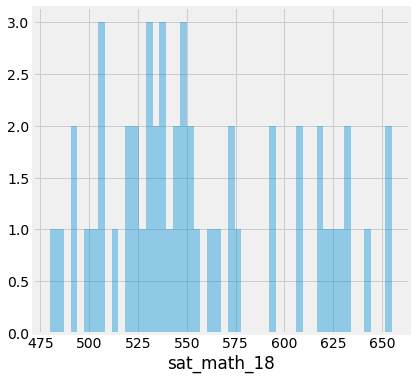

In [105]:
# Visualise the distribution of population mean for SAT Math 2018 scores
dist_plotter(final_df['sat_math_18'])

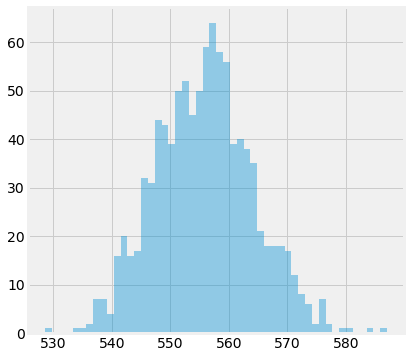

In [106]:
# Sampling SAT Math 2018 scores
means_sat_math_18 = sampler(final_df['sat_math_18'])

# Visualise the distribution of sampling means
dist_plotter(means_sat_math_18)

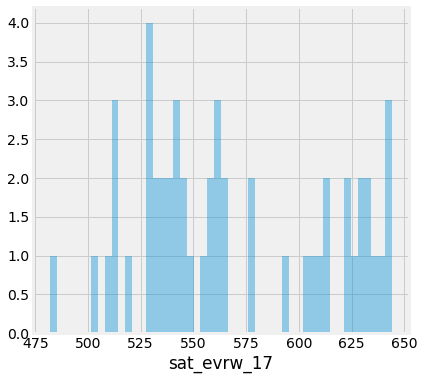

In [107]:
# Visualise the distribution of population mean for SAT Evidence-based Read/Writing 2017 scores
dist_plotter(final_df['sat_evrw_17'])

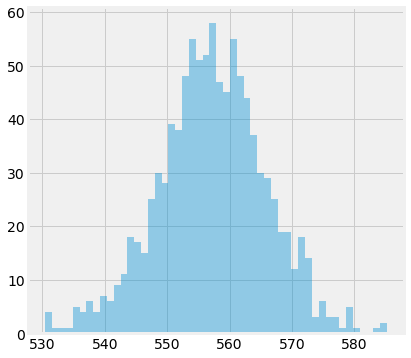

In [108]:
# Sampling SAT EVRW 2017 scores
means_sat_evrw_17 = sampler(final_df['sat_math_17'])

# Visualise the distribution of sampling means
dist_plotter(means_sat_evrw_17)

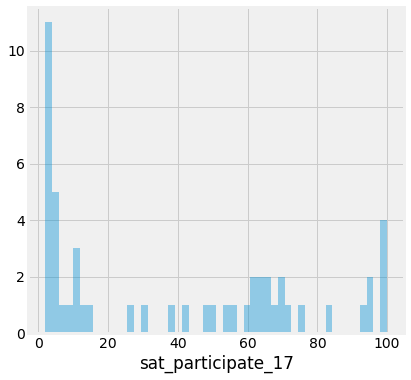

In [109]:
# Visualise SAT 2017 participation rates
dist_plotter(final_df['sat_participate_17'])

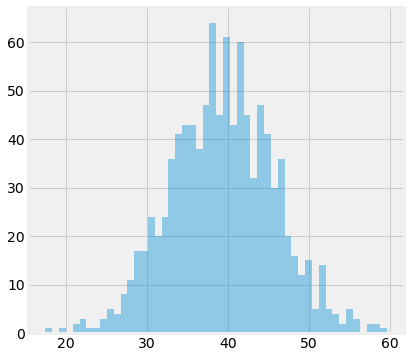

In [110]:
# Sampling SAT 2017 Participation rates
means_sat_participate_17 = sampler(final_df['sat_participate_17'])

# Visualise the distribution of sampling means
dist_plotter(means_sat_participate_17)

Answer: In general, we observe this is the sample will be normally distributed.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actual populations these data describe in answering this question)*

**Answer:** If we want to understand only the relationship between SAT and ACT participation rates in 2017, descriptive statistics should be sufficient for this purpose. The samples represents all 51 states. Graphical representations and summary statistics provides a quick method to make comparisons between different datasets.

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

**Answer:** No, while we can make inferrence on the relationships between SAT and ACT math scores, we cannot say that students with higher SAT math score is necessarily better than those with lower ACT math score. This is because of the potential differences between the format, structure and requirements between SAT and ACT math tests.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

**Answer:** Hypothesis testing is not necessary since the relationships we want to draw between variables can be achieved through descriptive statistics. For example, the relationship between participation rates and scores.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

**Answer:** The three states of interest are Colorado, Illinois and Rhode Island. 
- Colorado's participation rates for SAT surged from 11% to 100%, while ACT participation dropped from 100% to 30% between 2017 and 2018. Correspondingly, there is a decrease in SAT total score, and increase in ACT composite score.
- Similar trends are observed for Illinois and Rhode Island.

- From literature research, Colorado, Illinois and Illinois partnered with the the College Board partnered to administer SAT as a mandatory test __[mandatory test](https://blog.prepscholar.com/which-states-require-the-sat)__. As part of the implementation efforts, the College Board introduced a program in 2010 __[SAT school day](https://collegereadiness.collegeboard.org/sat/k12-educators/sat-school-day/about)__ meant to increase access to the SAT by waivering test fees (__[USD64.50](https://www.timeshighereducation.com/student/advice/difference-between-sats-and-acts#survey-answer)__ with essay vs. no cost) for low-income family students. In 2016, the SAT was redesigned to to align the SAT with __[Common Core Standards](https://blog.prepscholar.com/what-is-the-common-core)__. In general terms, the standards emphasize critical thinking and real-world problem-solving skills as opposed to rote memorization, which should better prepare students for College and their careers.



In [111]:
# Summary of Illinois's participation rates 2017-2018.
final_df.loc[['Colorado','Illinois', 'Rhode Island'],['sat_participate_17','sat_participate_18','act_participate_17', 'act_participate_18']]

,sat_participate_17,sat_participate_18,act_participate_17,act_participate_18
state,,,,
Colorado,11.0,100.0,100.0,30.0
Illinois,9.0,99.0,93.0,43.0
Rhode Island,71.0,97.0,21.0,15.0


In [112]:
# Summary of Colorado's total scores 2017-2018.
final_df.loc[['Colorado','Illinois', 'Rhode Island'],['sat_total_17','sat_total_18','act_composite_17', 'act_composite_18']]

,sat_total_17,sat_total_18,act_composite_17,act_composite_18
state,,,,
Colorado,1201.0,1025.0,20.8,23.9
Illinois,1115.0,1019.0,21.4,23.9
Rhode Island,1062.0,1018.0,24.0,24.2


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [113]:
# Function to display states with SAT 2017 participation ranges between 9 to 20%.
x = final_df[['sat_participate_17', 'sat_total_17', 'sat_participate_18', 'sat_total_18']]
x.loc[(psat_df['sat_participate_17']>=9.0) & (psat_df['sat_participate_17']<20.0)]

,sat_participate_17,sat_total_17,sat_participate_18,sat_total_18
state,,,,
Colorado,11.0,1201.0,100.0,1025.0
Illinois,9.0,1115.0,99.0,1019.0
Montana,10.0,1196.0,10.0,1198.0
New Mexico,11.0,1138.0,16.0,1093.0
Ohio,12.0,1149.0,18.0,1099.0
West Virginia,14.0,1086.0,28.0,999.0


In [114]:
# Summary of candidate Montana's total scores 2017-2018.
final_df.loc[['Montana'],['sat_total_17','sat_total_18']]

,sat_total_17,sat_total_18
state,,
Montana,1196.0,1198.0


**Answer:** The SAT participation rates are generally consistent between 2017 and 2018. Similar observation applies for ACT as well. SAT has a small cluster of states with high participation rates, and another cluster with 50-70% participation rates. ACT has a large cluster of states with high participation. For participation rates and scores, they are negatively correlated. Low particiation rates means the students participating in the tests tend to be better performing ones.

Generally, the states with significant increase in SAT participations between 2017 and 2018 have prior participation rates around the 9-11% range. The national __[average](https://www.testive.com/colorado-sat-change-2017/)__ score is 1020 in 2016 then. This could soften the ground further for the three states to adopt mandatory SAT test in 2017. 

The shift in participation rates is strongly driven by state policies in education.

The College Board could consider focusing on states with i) similar participation rates for the coming year (i.e. 2018 participation rates for 2019 efforts), and total scores close to the national average. Moving forwards, one potential candidate is **Montana**, with its 2018 participation rates 10% and mean SAT total score 1198. The national avaerage SAT score for 2018 is __[1060](https://blog.prepscholar.com/good-sat-score-for-2018)__. 
Understandably, transition from ACT to SAT is not an easy decision, with high stakes involved for students and families. Parents of the students would not concerned regarding whether their children can adjust to the new SAT test format and requirements. As part of the outreach effort, the College Board could consider working with the State's educational board to create materials (such as the partnership with Khan Academy to prepare the students for SAT tests) to ease student's transition from ACT to SAT. 

___